In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,RandomForestClassifier,RandomForestRegressor
import xgboost
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,f1_score,r2_score,accuracy_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC,SVR

In [375]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [28]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [376]:
def miss(df):
    f=df.isna().sum().reset_index().sort_values(by=0,ascending=False)
    return f.loc[f[0]>0]

In [377]:
miss(train),train.shape

(       index    0
 10     Cabin  687
 5        Age  177
 11  Embarked    2,
 (891, 12))

In [19]:
miss(test), test.shape

(   index    0
 9  Cabin  327
 4    Age   86
 8   Fare    1,
 (418, 11))

In [20]:
# in both the train and test sets, we have 90 percent of null values for Cabin  So there is no way we can do

In [378]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [27]:
df=pd.concat([train,test],axis=0)

In [25]:
train.shape,test.shape

((891, 11), (418, 10))

In [30]:
miss(df)

,index,0
1,Survived,418
5,Age,263
10,Embarked,2
9,Fare,1


In [31]:
## As there are very few missing values for embarked and fare, we can impute them with mode or median respectively

In [33]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [35]:
df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [36]:
miss(df)

,index,0
1,Survived,418
5,Age,263


In [38]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [40]:
## Imbalanced, We should do something

In [47]:
len(df['Name'].unique())

1307

In [48]:
df.shape

(1309, 11)

In [62]:
df['Name'][0].str.extract(pat='(Mr)')

,0
0,Mr
0,Mr


In [379]:
train['title']=train['Name'].str.extract(pat='(Mr|Mrs|Capt|Miss|Master|Col|Dr|Rev|Major|Mme|Mlle|Ms|Don)')

In [89]:
train['Name'].sample(10)

224                         Hoyt, Mr. Frederick Maxfield
351               Williams-Lambert, Mr. Fletcher Fellows
117                      Turpin, Mr. William John Robert
788                           Dean, Master. Bertram Vere
585                                  Taussig, Miss. Ruth
161    Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...
52              Harper, Mrs. Henry Sleeper (Myna Haxtun)
240                                Zabour, Miss. Thamine
572                     Flynn, Mr. John Irwin ("Irving")
647                  Simonius-Blumer, Col. Oberst Alfons
Name: Name, dtype: object

In [117]:
miss(train)

,index,0
5,Age,177
10,Embarked,2
11,title,2


In [380]:
train.loc[(train['title'].isna()),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,S,NaN
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,NaN


In [124]:
train['title'].value_counts()

Mr        635
Miss      180
Master     40
Col        10
Dr         10
Rev         6
Mlle        2
Major       2
Mme         1
Don         1
Capt        1
Ms          1
Name: title, dtype: int64

In [381]:
test['title']=test['Name'].str.extract(pat='(Mr|Mrs|Capt|Miss|Master|Col|Dr|Rev|Major|Mme|Mlle|Ms|Don)')

In [382]:
miss(test)

,index,0
4,Age,86
8,Fare,1


In [383]:
test['title'].value_counts()

Mr        309
Miss       77
Master     20
Col         4
Dr          4
Don         2
Rev         2
Name: title, dtype: int64

In [387]:
train['title'].value_counts()

Mr        641
Miss      181
Master     40
Col        10
Dr         10
Rev         6
Don         1
Name: title, dtype: int64

In [385]:
train.loc[train['title']=='Ms','title']='Miss'

In [386]:
train.loc[train['title'].isin(['Mme','Mlle','Major','Capt']),'title']='Mr'

In [391]:
miss(train)

,index,0
5,Age,177
10,Embarked,2


In [392]:
miss(test)

,index,0
4,Age,86
8,Fare,1


In [393]:
train.shape,test.shape

((891, 12), (418, 11))

In [390]:
train.loc[train['title'].isna(),'title']='Mr'

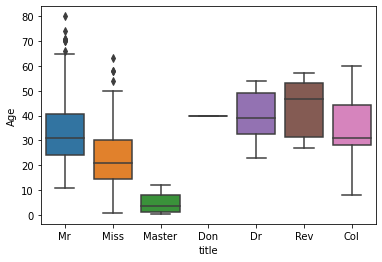

In [156]:
sns.boxplot(data=train,x='title',y='Age')

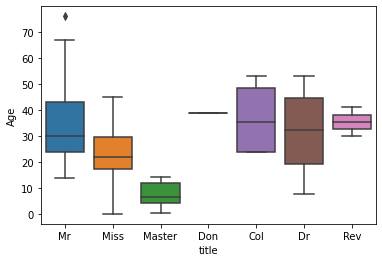

In [157]:
sns.boxplot(data=test,x='title',y='Age')

In [158]:
## So depending upon the titles we can substitute Age

In [394]:
train.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
test.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

In [161]:
#Ticket has more Unique columns so there is no need for it

In [395]:
train['fam_size']=train['SibSp']+train['Parch']
test['fam_size']=test['SibSp']+test['Parch']

In [396]:
train['fam_size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: fam_size, dtype: int64

In [397]:
test['fam_size'].value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: fam_size, dtype: int64

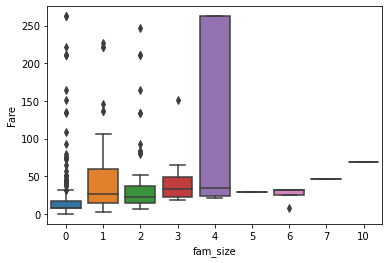

In [432]:
sns.boxplot(data=test,x='fam_size',y='Fare')

In [434]:
train.groupby('fam_size')['Fare'].median()

fam_size
0      8.1375
1     26.0000
2     24.1500
3     27.7500
4     25.4667
5     29.1250
6     31.2750
7     46.9000
10    69.5500
Name: Fare, dtype: float64

In [436]:
miss(train)

,index,0
3,Age,177
7,Embarked,2


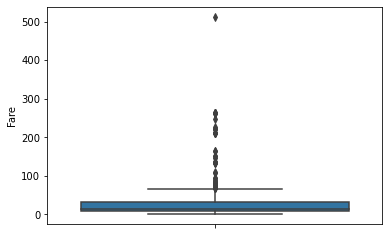

In [401]:
sns.boxplot(test['Fare'],orient='v')

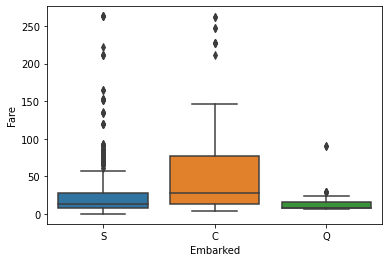

In [437]:
sns.boxplot(data=train,x='Embarked',y='Fare')

In [438]:
train.groupby('fam_size')['Fare'].median()

fam_size
0      8.1375
1     26.0000
2     24.1500
3     27.7500
4     25.4667
5     29.1250
6     31.2750
7     46.9000
10    69.5500
Name: Fare, dtype: float64

In [412]:
test.loc[(test['fam_size']==5) & (test['Fare']>200),'Fare']=29

In [427]:
train.loc[(train['Fare']>300) & (train['fam_size']==1),'Fare']=26

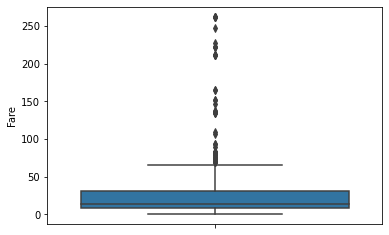

In [430]:
sns.boxplot(test['Fare'],orient='v')

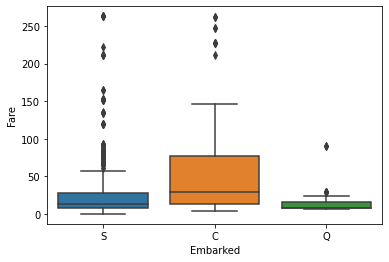

In [226]:
sns.boxplot(data=train,x='Embarked',y='Fare')

In [212]:
test.drop(index=inds,inplace=True)

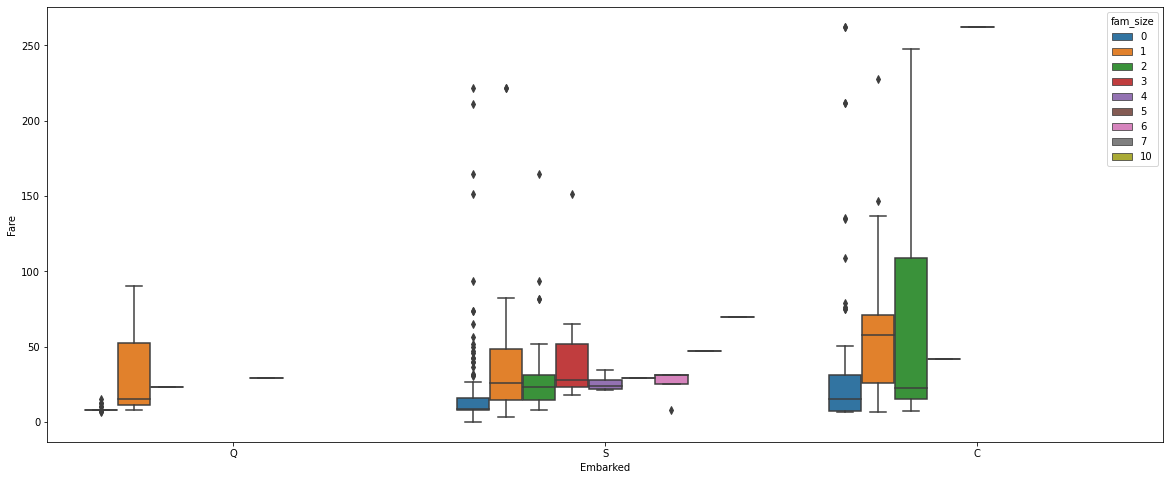

In [439]:
plt.figure(figsize=(20,8))
sns.boxplot(data=test,x='Embarked',y='Fare',hue='fam_size')

In [230]:
train.groupby('Embarked')['Fare'].median()

Embarked
C    28.7125
Q     7.7500
S    13.0000
Name: Fare, dtype: float64

In [231]:
test.groupby('Embarked')['Fare'].median()

Embarked
C    27.7208
Q     7.7500
S    13.7750
Name: Fare, dtype: float64

In [232]:
## Fare is dependent on Embarked and on the family size

In [443]:
miss(test)

,index,0
2,Age,86
5,Fare,1


In [441]:
train.loc[train['Embarked'].isna(),'Embarked']='S'

In [243]:
train.loc[train['fam_size']==0,'Embarked'].value_counts()

S    393
C     83
Q     57
Name: Embarked, dtype: int64

In [252]:
train.loc[train['fam_size']==0,'Fare'].median()

8.1125

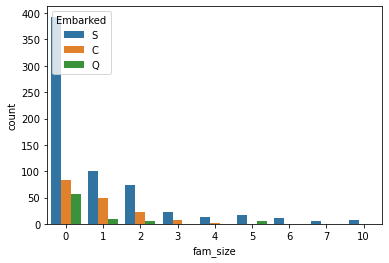

In [255]:
sns.countplot(data=train,x='fam_size',hue='Embarked')

In [445]:
miss(test)

,index,0
2,Age,86


In [444]:
test.loc[test['Fare'].isna(),'Fare']=13.7750

In [261]:
test.groupby('Embarked')['Fare'].median()

Embarked
C    27.7208
Q     7.7500
S    13.7750
Name: Fare, dtype: float64

In [268]:
miss(train)

,index,0
4,Age,177


In [269]:
miss(test)

,index,0
3,Age,86


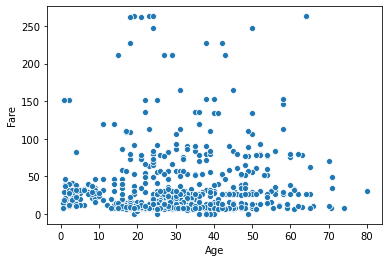

In [271]:
sns.scatterplot(data=train,x='Age',y='Fare')

In [272]:
## Age and Fare are not correlated

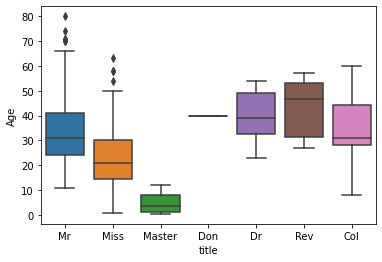

In [274]:
sns.boxplot(data=train,x='title',y='Age')

In [446]:
train.groupby('title')['Age'].median()

title
Col       31.0
Don       40.0
Dr        39.0
Master     3.5
Miss      21.0
Mr        31.0
Rev       46.5
Name: Age, dtype: float64

In [447]:
train.loc[(train['Age'].isna()) & (train['title']=='Mr'),'Age']=31
train.loc[(train['Age'].isna()) & (train['title']=='Col'),'Age']=31
train.loc[(train['Age'].isna()) & (train['title']=='Don'),'Age']=40
train.loc[(train['Age'].isna()) & (train['title']=='Dr'),'Age']=39
train.loc[(train['Age'].isna()) & (train['title']=='Miss'),'Age']=21
train.loc[(train['Age'].isna()) & (train['title']=='Rev'),'Age']=46.5

In [448]:
train.loc[(train['Age'].isna()) & (train['title']=='Master'),'Age']=3.5

In [449]:
miss(train)

,index,0


In [284]:
#train.loc[(train['title']=='Master') & (train['Age']==31),'Age']=3.5

In [451]:
train.loc[train['title']=='Master','Age'].min()

In [452]:
test.shape

(418, 9)

In [453]:
train.loc[(train['Age']<=10) & (train['title']!='Master'),'title']='Master'

In [454]:
miss(test)

,index,0
2,Age,86


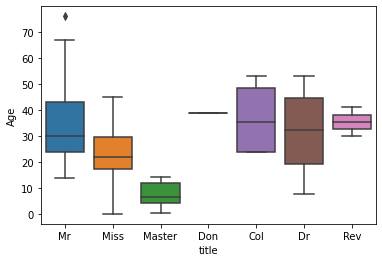

In [455]:
sns.boxplot(data=test,x='title',y='Age')

In [456]:
test.groupby('title')['Age'].median()

title
Col       35.5
Don       39.0
Dr        32.5
Master     6.5
Miss      22.0
Mr        30.0
Rev       35.5
Name: Age, dtype: float64

In [457]:
test.loc[(test['Age'].isna()) & (test['title']=='Master'),'Age']=6.5
test.loc[(test['Age'].isna()) & (test['title']=='Col'),'Age']=35.5
test.loc[(test['Age'].isna()) & (test['title']=='Don'),'Age']=39
test.loc[(test['Age'].isna()) & (test['title']=='Dr'),'Age']=32.5
test.loc[(test['Age'].isna()) & (test['title']=='Miss'),'Age']=22
test.loc[(test['Age'].isna()) & (test['title']=='Mr'),'Age']=30
test.loc[(test['Age'].isna()) & (test['title']=='Rev'),'Age']=35.5

In [458]:
miss(test)

,index,0


In [303]:
#Filled null values of age based on titles that are extracted using Name column in both train and test sets

In [304]:
#substited using median

In [460]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [461]:
test.shape,train.shape

((418, 7), (891, 8))

In [462]:
train['Sex']=train['Sex'].replace({'male':0,'female':1})

In [463]:
test['Sex']=test['Sex'].replace({'male':0,'female':1})

In [470]:
train.Age=round(train.Age)

In [471]:
test.Age=round(test.Age)

In [472]:
train.Age=train.Age.astype('int64')
test.Age=test.Age.astype('int64')

In [475]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,title,fam_size
0,0,3,0,22,7.25,S,Mr,1
1,1,1,1,38,71.28,C,Mr,1
2,1,3,1,26,7.92,S,Miss,0
3,1,1,1,35,53.10,S,Mr,1
4,0,3,0,35,8.05,S,Mr,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,13.00,S,Rev,0
887,1,1,1,19,30.00,S,Miss,0
888,0,3,1,21,23.45,S,Miss,3
889,1,1,0,26,30.00,C,Mr,0


In [474]:
train.Fare=round(train.Fare,2)
test.Fare=round(test.Fare,2)

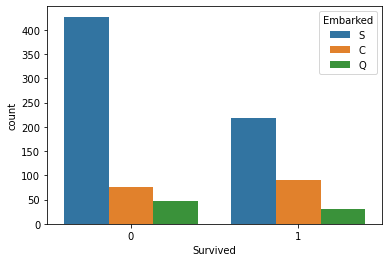

In [334]:
sns.countplot(data=train,x='Survived',hue='Embarked')

In [333]:
train.groupby(['Survived','Embarked'])['Embarked'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            90
          Q            30
          S           219
Name: Embarked, dtype: int64

In [335]:
train['Survived'].value_counts()

0    549
1    339
Name: Survived, dtype: int64

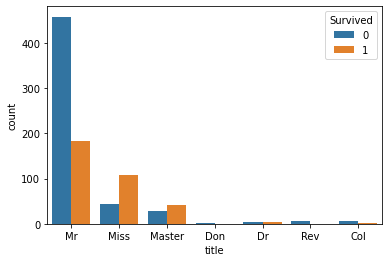

In [339]:
sns.countplot(data=train,x='title',hue='Survived')

In [340]:
train.groupby(['Survived','title'])['title'].count()

Survived  title 
0         Col         7
          Don         1
          Dr          5
          Master     29
          Miss       43
          Mr        458
          Rev         6
1         Col         2
          Dr          5
          Master     42
          Miss      107
          Mr        183
Name: title, dtype: int64

In [476]:
train.to_csv('THop_train.csv',index=False)
test.to_csv('THop_test.csv',index=False)

In [477]:
y=train['Survived']

In [478]:
X=train.drop(columns=['Survived'])

In [479]:
test.shape,X.shape

((418, 7), (891, 7))

In [480]:
X_train=pd.get_dummies(X,drop_first=True)
X_test=pd.get_dummies(test,drop_first=True)

In [481]:
X_train.shape,X_test.shape

((891, 13), (418, 13))

In [482]:
rf=RandomForestClassifier()

In [483]:
rf.fit(X_train,y)

RandomForestClassifier()

In [484]:
y_pred=rf.predict(X_test)

In [485]:
t=pd.read_csv('test.csv')

In [366]:
X_train.drop(columns=['PassengerId'],inplace=True)
X_test.drop(columns=['PassengerId'],inplace=True)

In [486]:
sumb=pd.DataFrame(t['PassengerId'])

In [490]:
sumb['Survived']=y_pred

In [493]:
sumb.to_csv('RandomForestClassifier.csv',index=False)

In [492]:
sumb.drop(columns=['Survival'],inplace=True)

In [494]:
mod=xgboost.XGBClassifier()

In [495]:
mod.fit(X_train,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [496]:
ypp=mod.predict(X_test)

In [497]:
sumb['Survived']=ypp

In [498]:
sumb.to_csv('XGBOOST.csv',index=False)

In [531]:
mit=pd.DataFrame()

In [532]:
mit

""


In [533]:
for depth in range(2,30):
    mod=RandomForestClassifier(max_depth=depth,max_leaf_nodes=25)
    mod.fit(X_train,y)
    ypp=mod.predict(X_test)
    mit[depth]=ypp

In [535]:
sumb['Survived']=mit[10]

In [536]:
sumb.to_csv('max 10.csv',index=False)

In [538]:
rf=RandomForestClassifier()

In [539]:
rf

RandomForestClassifier()

In [ ]:
RandomizedSearchCV()

In [540]:
est=[i*100 for i in range(1,11)]

In [541]:
est

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [542]:
depth=[i for i in range(1,26)]
leaf=[i for i in range(1,26)]

In [544]:
params={
    'n_estimators':est,
    'max_depth':depth,
    'max_leaf_nodes':leaf
}

In [547]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [545]:
r=RandomizedSearchCV(estimator=rf,param_distributions=params,n_iter=10)

In [548]:
r.fit(X_train,y)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]})